In [75]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [76]:
#Read the data
ToyotaCorolla = pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')
ToyotaCorolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [77]:
##Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [78]:
## Selecting specific given columns
df=ToyotaCorolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]].copy()
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [79]:
df.shape

(1436, 9)

In [80]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [81]:
# there are no missing values in the data

In [82]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [84]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


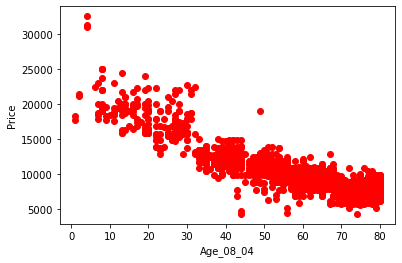

In [85]:
plt.scatter(x =df["Age_08_04"], y=df["Price"],  color='red')
plt.xlabel('Age_08_04')
plt.ylabel('Price')
plt.show()

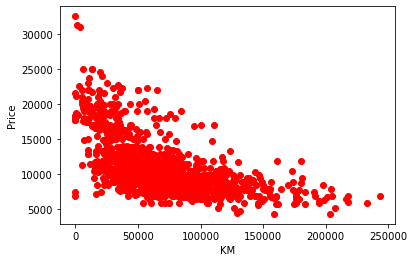

In [86]:
plt.scatter(x =df["KM"], y=df["Price"],  color='red')
plt.xlabel('KM')
plt.ylabel('Price')
plt.show()

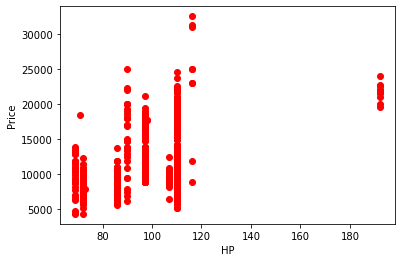

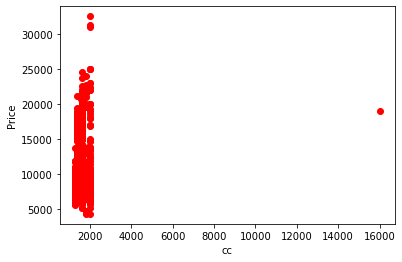

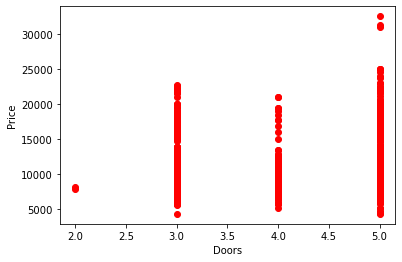

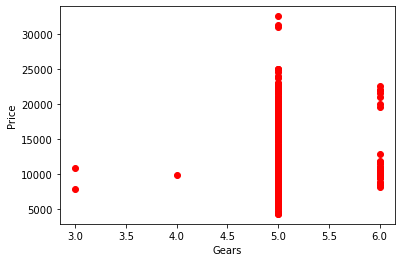

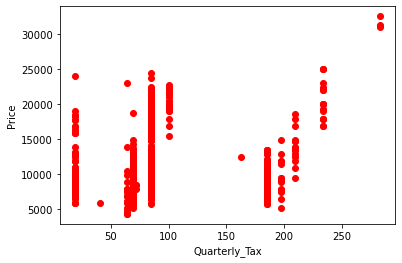

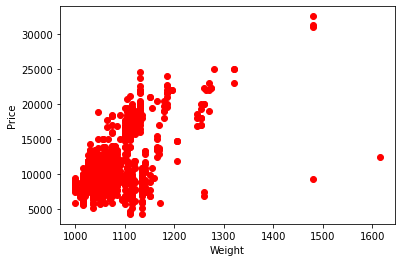

In [87]:
import matplotlib.pyplot as plt
plt.scatter(x =df["HP"], y=df["Price"],  color='red')
plt.xlabel('HP')
plt.ylabel('Price')
plt.show()

import matplotlib.pyplot as plt
plt.scatter(x =df["cc"], y=df["Price"],  color='red')
plt.xlabel('cc')
plt.ylabel('Price')
plt.show()


import matplotlib.pyplot as plt
plt.scatter(x =df["Doors"], y=df["Price"],  color='red')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

import matplotlib.pyplot as plt
plt.scatter(x =df["Gears"], y=df["Price"],  color='red')
plt.xlabel('Gears')
plt.ylabel('Price')
plt.show()

import matplotlib.pyplot as plt
plt.scatter(x =df["Quarterly_Tax"], y=df["Price"],  color='red')
plt.xlabel('Quarterly_Tax')
plt.ylabel('Price')
plt.show()

import matplotlib.pyplot as plt
plt.scatter(x =df["Weight"], y=df["Price"],  color='red')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

In [88]:
# based on above scatter plots, we can consider Age_08_04, KM, Weight variables for building model,
## the rest all variables not having strong linear relation with price.

In [89]:
X1 = df[["Age_08_04"]]
X2 = df[["Age_08_04","KM"]] 
X3 = df[["Age_08_04","Weight"]]
X4 = df[["KM","Weight"]]
X5 = df[["Age_08_04","KM","Weight"]]

Y = df["Price"]

In [90]:
# Model 1 fitting
import statsmodels.formula.api as smf
model_1=smf.ols("Y~X1", data=df).fit()
model_1

In [91]:
model_1.params

Intercept    20294.058649
X1            -170.933585
dtype: float64

In [92]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:18:19   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
X1          -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
Y_pred1 =model_1.predict(X1)
Y_pred1

0       16362.586194
1       16362.586194
2       16191.652609
3       15849.785439
4       15166.051099
            ...     
1431     8499.641283
1432     7986.840528
1433     8157.774113
1434     8328.707698
1435     7303.106188
Length: 1436, dtype: float64

In [94]:
# model 1 metrics
from sklearn.metrics import mean_squared_error, r2_score
m1mse = mean_squared_error(Y,Y_pred1)
print("Model1 Mean square error:", m1mse)
m1r2 = r2_score(Y,Y_pred1)
print("Model1 R square:", m1r2)

import numpy as np
m1RMSE = np.sqrt(m1mse)
print("Model1 Root mean square error:", m1RMSE.round(2))


Model1 Mean square error: 3044403.458963609
Model1 R square: 0.7684108996825327
Model1 Root mean square error: 1744.82


In [95]:
import statsmodels.formula.api as smf
model_2=smf.ols("Y~X2", data=df).fit()
model_2

In [96]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:18:19   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
X2[0]       -154.1492      2.736    -56.334      0.000    -159.517    -148.782
X2[1]         -0.0165      0.001    -12.130      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
model_2.params

Intercept    20483.113534
X2[0]         -154.149180
X2[1]           -0.016461
dtype: float64

In [98]:
Y_pred2 =model_2.predict(X2)
Y_pred2

0       16164.268295
1       15737.101285
2       16096.948369
3       15685.129784
4       15224.908023
            ...     
1431     9508.655127
1432     9071.622632
1433     9258.429488
1434     9414.224721
1435     8767.759371
Length: 1436, dtype: float64

In [99]:
# model 2 metrics
from sklearn.metrics import mean_squared_error, r2_score
m2mse = mean_squared_error(Y,Y_pred2)
print("Model2 Mean square error:", m2mse)
m2r2 = r2_score(Y,Y_pred2)
print("Model2 R square:", m2r2)

import numpy as np
m2RMSE = np.sqrt(m2mse)
print("Model2 Root mean square error:", m2RMSE.round(2))

Model2 Mean square error: 2760910.650376827
Model2 R square: 0.789976321405393
Model2 Root mean square error: 1661.6


In [100]:
# model 3 fitting
import statsmodels.formula.api as smf
model_3=smf.ols("Y~X3", data=df).fit()
model_3

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2959.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:18:20   Log-Likelihood:                -12633.
No. Observations:                1436   AIC:                         2.527e+04
Df Residuals:                    1433   BIC:                         2.529e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3149.7074   1052.897      2.991      0.003    1084.324    5215.091
X3[0]       -151.0391      2.577    -58.610      0.000    -156.094    -145.984
X3[1]         14.9482      0.911     16.417      0.000      13.162      16.734
==============================================================================
Omnibus:                      150.983   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              949.444
Skew:                          -0.249   Prob(JB):                    6.77e-207
Kurtosis:                       6.952   Cond. No.                     2.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
model_3.params

Intercept    3149.707419
X3[0]        -151.039115
X3[1]          14.948175
dtype: float64

In [102]:
Y_pred3 =model_3.predict(X3)
Y_pred3

0       17090.431538
1       17090.431538
2       16939.392423
3       16637.314192
4       16107.898606
            ...     
1431     8049.887749
1432     7447.288654
1433     7598.327769
1434     7749.366884
1435     8323.001509
Length: 1436, dtype: float64

In [103]:
# model 3 metrics
from sklearn.metrics import mean_squared_error, r2_score
m3mse = mean_squared_error(Y,Y_pred3)
print("Model3 Mean square error:", m3mse)
m3r2 = r2_score(Y,Y_pred3)
print("Model3 R square:", m3r2)

import numpy as np
m3RMSE = np.sqrt(m3mse)
print("Model3 Root mean square error:", m3RMSE.round(2))

Model3 Mean square error: 2562472.8214113964
Model3 R square: 0.8050715736932419
Model3 Root mean square error: 1600.77


In [104]:
# model 4 fitting
import statsmodels.formula.api as smf
model_4=smf.ols("Y~X4", data=df).fit()
model_4

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1297.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          2.62e-322
Time:                        00:18:21   Log-Likelihood:                -13065.
No. Observations:                1436   AIC:                         2.614e+04
Df Residuals:                    1433   BIC:                         2.615e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.737e+04   1173.812    -23.321      0.000   -2.97e+04   -2.51e+04
X4[0]         -0.0536      0.002    -35.132      0.000      -0.057      -0.051
X4[1]         38.9532      1.086     35.866      0.000      36.823      41.084
==============================================================================
Omnibus:                      377.313   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4927.218
Skew:                          -0.843   Prob(JB):                         0.00
Kurtosis:                      11.916   Cond. No.                     1.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
model_4.params

Intercept   -27374.759440
X4[0]           -0.053553
X4[1]           38.953211
dtype: float64

In [106]:
Y_pred4 =model_4.predict(X4)
Y_pred4

0       15489.490391
1       14099.736366
2       15771.982490
3       15435.187644
4       16138.707246
            ...     
1431    11452.089341
1432    11145.243066
1433    11251.492228
1434    11256.847528
1435    16019.064533
Length: 1436, dtype: float64

In [107]:
# model 4 metrics
from sklearn.metrics import mean_squared_error, r2_score
m4mse = mean_squared_error(Y,Y_pred4)
print("Model4 Mean square error:", m4mse)
m4r2 = r2_score(Y,Y_pred4)
print("Model4 R square:", m4r2)

import numpy as np
m4RMSE = np.sqrt(m4mse)
print("Model4 Root mean square error:", m4RMSE.round(2))

Model4 Mean square error: 4676914.12875168
Model4 R square: 0.6442251002735442
Model4 Root mean square error: 2162.62


In [108]:
# model 5 fitting
import statsmodels.formula.api as smf
model_5=smf.ols("Y~X5", data=df).fit()
model_5

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2665.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:18:21   Log-Likelihood:                -12454.
No. Observations:                1436   AIC:                         2.492e+04
Df Residuals:                    1432   BIC:                         2.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1880.3356    962.718     -1.953      0.051   -3768.825       8.153
X5[0]       -120.2212      2.742    -43.841      0.000    -125.600    -114.842
X5[1]         -0.0242      0.001    -20.142      0.000      -0.027      -0.022
X5[2]         19.5760      0.836     23.409      0.000      17.936      21.216
==============================================================================
Omnibus:                      221.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.082
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       9.013   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
model_5.params

Intercept   -1880.335564
X5[0]        -120.221174
X5[1]          -0.024183
X5[2]          19.576043
dtype: float64

In [110]:
Y_pred5 =model_5.predict(X5)
Y_pred5

0       17024.410447
1       16396.840055
2       17031.754062
3       16639.225468
4       16485.958524
            ...     
1431     9393.034572
1432     8873.949011
1433     9042.149055
1434     9164.788518
1435    10790.543506
Length: 1436, dtype: float64

In [111]:
# model 5 metrics
from sklearn.metrics import mean_squared_error, r2_score
m5mse = mean_squared_error(Y,Y_pred5)
print("Model5 Mean square error:", m5mse)
m5r2 = r2_score(Y,Y_pred5)
print("Model5 R square:", m5r2)

import numpy as np
m5RMSE = np.sqrt(m5mse)
print("Model5 Root mean square error:", m5RMSE.round(2))

Model5 Mean square error: 1996777.7613788072
Model5 R square: 0.848104243893788
Model5 Root mean square error: 1413.07


In [112]:
data = {"MODEL":pd.Series(["Model1","Model2","Model3","Model4","model5"]),
        "RMSE_Values":pd.Series([m1RMSE,m2RMSE,m3RMSE,m4RMSE,m5RMSE]),
        "Rsquare":pd.Series([m1r2,m2r2,m3r2,m4r2,m5r2])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,Model1,1744.821899,0.768411
1,Model2,1661.598824,0.789976
2,Model3,1600.772570,0.805072
3,Model4,2162.617425,0.644225
4,model5,1413.073870,0.848104


In [113]:
## based on above results we can say model 5 is best model with high R2 value and low RMSE value,
## so we can consider "Age_08_04","KM","Weight" independendent variables for predicting price.


# Calculating VIF

In [114]:
rsq_A = smf.ols('Age_08_04~KM+Weight',data=df).fit().rsquared  
vif_A = 1/(1-rsq_A) 

rsq_wt = smf.ols('Weight~Age_08_04+KM',data=df).fit().rsquared  
vif_wt = 1/(1-rsq_wt)

rsq_KM = smf.ols('KM~Age_08_04+Weight',data=df).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 


# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','Weight','KM'],'VIF':[vif_A,vif_wt,vif_KM]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.864352
1,Weight,1.388765
2,KM,1.453261


In [115]:
## VIF values for independent variables are less than 5, so we can say there is no multi collineraity b/w variables

# Residual Analysis
Test for Normality of Residuals (Q-Q Plot)

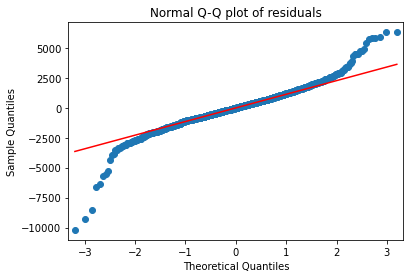

In [116]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_5.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [117]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

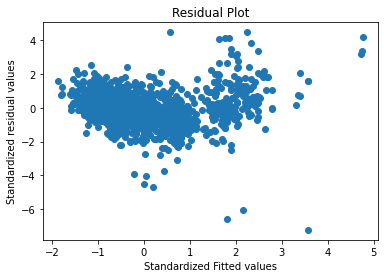

In [118]:
plt.scatter(get_standardized_values(model_5.fittedvalues),
            get_standardized_values(model_5.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [119]:
model_influence = model_5.get_influence()
(c, _) = model_influence.cooks_distance

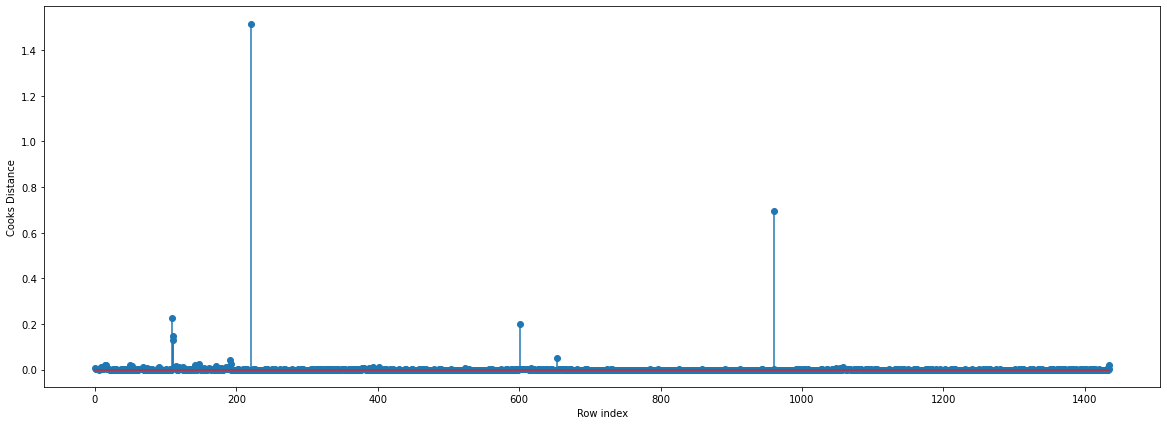

In [120]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [121]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 1.516544835240582)

# High Influence points

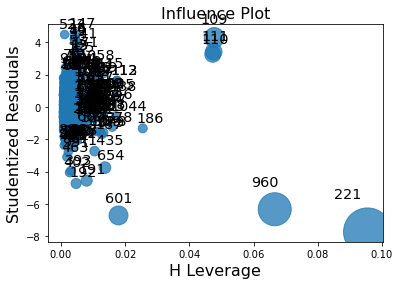

In [122]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_5)
plt.show()

In [123]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [124]:
leverage_cutoff

0.020891364902506964

From the above plot, it is evident that data point 221,110,117,186 and 960 are the influencers

In [125]:
df[df.index.isin([221, 110,111,186,960])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
186,6950,43,243000,69,1900,3,5,185,1110
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [126]:
#See the differences with other variable values
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [127]:
#Load the data
df_new = df

In [128]:
df_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [129]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df_new.drop(df_new.index[[221, 110,111,186,960]],axis=0).reset_index()

In [130]:
df1

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1426,1431,7500,69,20544,86,1300,3,5,69,1025
1427,1432,10845,72,19000,86,1300,3,5,69,1015
1428,1433,8500,71,17016,86,1300,3,5,69,1015
1429,1434,7250,70,16916,86,1300,3,5,69,1015


In [131]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [132]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [133]:
final_ml= smf.ols('Price~Age_08_04+KM+Weight',data = df1).fit()

In [134]:
final_ml.rsquared

0.8541351716400143

Cook’s Distance

In [135]:
model_influence1 = final_ml.get_influence()
(c_1, _) = model_influence1.cooks_distance

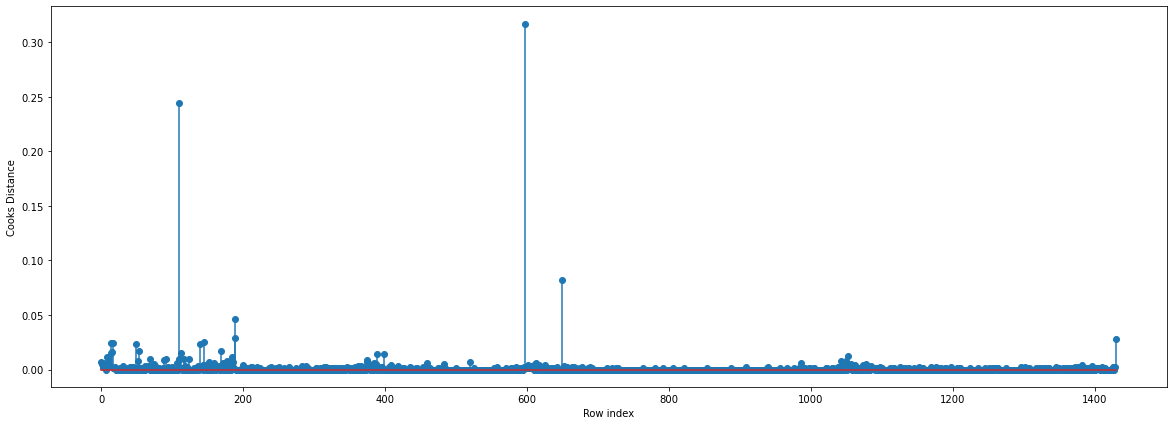

In [136]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [137]:
#index of the data points where c is more than .5
(np.argmax(c_1),np.max(c_1))

(597, 0.3170073583785471)

In [138]:
## Since the value is < 0.5 , we can stop the diagnostic process and finalize the model

# Predicting for new data

In [139]:
#New data for prediction
new_data=pd.DataFrame({"Age_08_04": 45,"KM":55000, "HP":90 ,"cc":1600 , "Doors":3 ,"Gears":5,"Quarterly_Tax":200 ,"Weight":1050},index=[1])

In [140]:
final_ml.predict(new_data)

1    11842.416786
dtype: float64